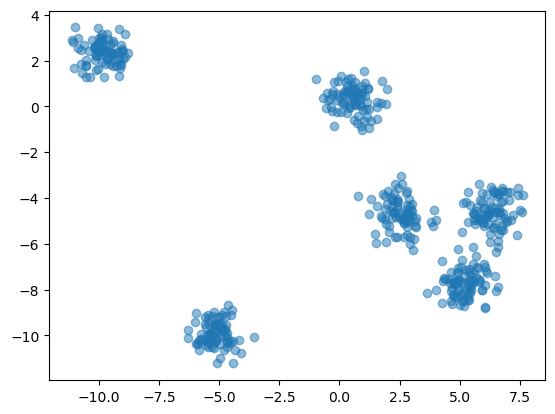

In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
%matplotlib inline

center = 6
X , y = make_blobs( n_samples =500 , centers = center , cluster_std = 0.6 )
plt.scatter(X[:,0], X[:, 1], alpha =0.5 )

In [2]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
cluster_numbers = np.arange(2, 11)
cluster_numbers

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

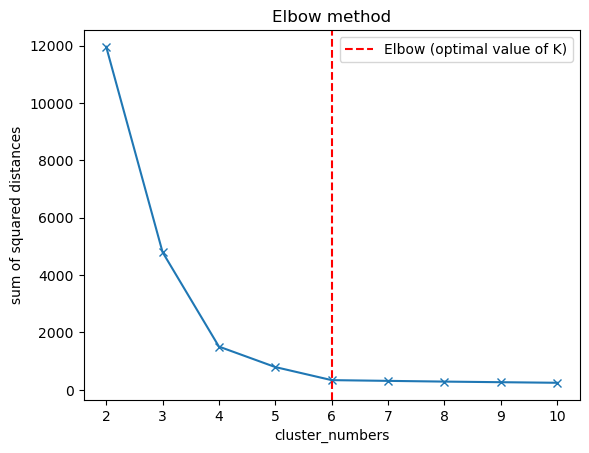

In [4]:
inertia =[]
silhouette_scores = []

for k in cluster_numbers :
    kmeans = KMeans(n_clusters = k , n_init=10 , random_state=42).fit(X)
    
    inertia.append(kmeans.inertia_ )

    silhouette_avg = silhouette_score(X, kmeans.labels_ )
    silhouette_scores.append(silhouette_avg)
    
# Elbow method
#Inertia measures how well a dataset was clustered by K-Means.
# It is calculated as the sum of squared distances between each data point and its assigned cluster's centroid
# The lower the inertia, the better the clustering, as it indicates that the data points within each cluster are closer to their centroid.
plt.plot(cluster_numbers , inertia , marker='x')
plt.xlabel('cluster_numbers')
plt.ylabel('sum of squared distances')
plt.title('Elbow method')
plt.axvline(x=center, linestyle='--', color='r', label='Elbow (optimal value of K)')
plt.legend()

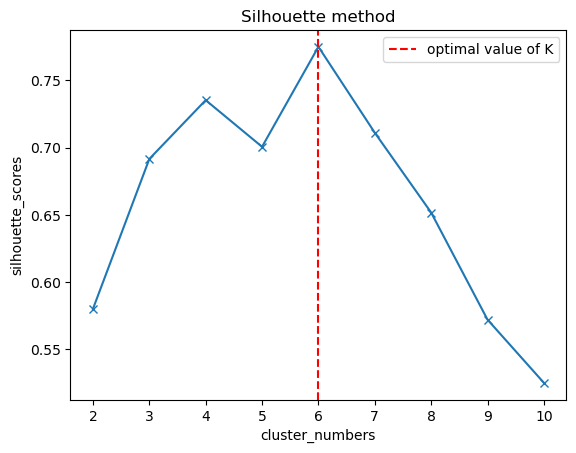

In [5]:
# Silhouette method

plt.plot(cluster_numbers , silhouette_scores , marker='x')
plt.xlabel('cluster_numbers')
plt.ylabel('silhouette_scores')
plt.title('Silhouette method')
plt.axvline(x=center, linestyle='--', color='r', label='optimal value of K')
plt.legend()


In [6]:
# s(i) = (b(i) - a(i)) / max(a(i), b(i)) 
# a(i) is the average distance between i to the other data points in the same cluster.
# b(i) is the average distance between i to the other data points outsiade cluster.

# range of silhouette coefficient is (-1,1)
# If the coefficient value is closer to 1, that means the point is similar to all other points in the same cluster.
# If the coefficient value is closer to -1, that means the point is highly dissimilar with others of its cluster and assigned in the wrong cluster.
